In [3]:
import bilby
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns
import argparse



# CIT runs results

In [ ]:
paths_res= pd.read_csv('TGR-lenisng real events.csv')
paths_res.head()

In [3]:
paths_res['PATH to GR samples'].values

array(['/home/daniel.williams/events/O3/o3a/run_directories/S190412a/ProdF5/result/ProdF5_data0_1239082262-17041_analysis_H1L1V1_dynesty_merge_result.json',
       '/home/daniel.williams/events/O3/o3b/run_directories/S200129a/Prod5/result/Prod5_data0_1264316116-433214_analysis_H1L1V1_dynesty_merge_result.json',
       '/home/daniel.williams/events/O3/o3a_final/run_directories/S190521b/ProdF5/result/ProdF5_data0_1242459857-466309_analysis_H1L1_dynesty_merge_result.json',
       '/home/daniel.williams/events/O3/o3b/run_directories/S200112a/Prod8/result/Prod8_data0_1262879936-090936_analysis_L1V1_dynesty_merge_result.json',
       '/home/daniel.williams/events/O3/o3b/run_directories/S200224a/Prod5/result/Prod5_data0_1266618172-401773_analysis_H1L1V1_dynesty_merge_result.json'],
      dtype=object)

In [4]:
paths_res.set_index('Event Name LVC', inplace=True)

In [5]:
res_GR_arr=[]
res_nonGR_arr=[]

for event in paths_res.index.values:
    print('Reading ..', event)
    json_file_GR=paths_res.loc[event]['PATH to GR samples']
    json_file_nonGR = paths_res.loc[event]['PATH to nonGR samples']
    print(' reading GR posteriors')
    f=open(json_file_GR)
    #res_GR = bilby.result.read_in_result()
    res_GR = json.load(f)
    f.close()
    res_GR_arr.append(res_GR)
    paths_res.loc[event,'Log evidence GR'] = res_GR['log_evidence']
    print(' reading non-GR posteriors')
    #res_nonGR = bilby.result.read_in_result(json_file_nonGR)
    f=open(json_file_nonGR)
    #res_GR = bilby.result.read_in_result()
    res_nonGR = json.load(f)
    paths_res.loc[event,'Log evidence nonGR'] = res_nonGR['log_evidence']
    f.close()
    res_nonGR_arr.append(res_nonGR)

Reading .. GW190412
 reading GR posteriors
 reading non-GR posteriors
Reading .. S200129a
 reading GR posteriors
 reading non-GR posteriors
Reading .. S190521b
 reading GR posteriors
 reading non-GR posteriors
Reading .. S200112a
 reading GR posteriors
 reading non-GR posteriors
Reading .. S200224a
 reading GR posteriors
 reading non-GR posteriors


In [6]:
res_nonGR.keys()

dict_keys(['label', 'outdir', 'sampler', 'log_evidence', 'log_evidence_err', 'log_noise_evidence', 'log_bayes_factor', 'priors', 'posterior', 'injection_parameters', 'meta_data', 'search_parameter_keys', 'fixed_parameter_keys', 'constraint_parameter_keys', 'sampling_time', 'sampler_kwargs', 'use_ratio', 'information_gain', 'log_likelihood_evaluations', 'log_prior_evaluations', 'num_likelihood_evaluations', 'samples', 'parameter_labels', 'parameter_labels_with_unit', 'version'])

In [7]:
paths_res['Log_BF_NGR_GR'] = paths_res['Log evidence nonGR'] - paths_res['Log evidence GR']
paths_res

Prod                                 PATH to GR samples  \
Event Name LVC                                                              
GW190412        ProdF5  /home/daniel.williams/events/O3/o3a/run_direct...   
S200129a         Prod5  /home/daniel.williams/events/O3/o3b/run_direct...   
S190521b        ProdF5  /home/daniel.williams/events/O3/o3a_final/run_...   
S200112a         Prod8  /home/daniel.williams/events/O3/o3b/run_direct...   
S200224a         Prod5  /home/daniel.williams/events/O3/o3b/run_direct...   

                                            PATH to nonGR samples  \
Event Name LVC                                                      
GW190412        /home/aditya.vijaykumar/public_html/work/lensi...   
S200129a        /home/aditya.vijaykumar/public_html/work/lensi...   
S190521b        /home/aditya.vijaykumar/public_html/work/lensi...   
S200112a        /home/aditya.vijaykumar/public_html/work/lensi...   
S200224a        /home/aditya.vijaykumar/public_html/work/lensi...   

                Log evidence GR  Log evidence nonGR  Plots  Status  \
Event Name LVC                                                       
GW190412          -42300.411305       -42302.256143    NaN     NaN   
S200129a          -21013.273619       -21017.570512    NaN     NaN   
S190521b           -1631.644793        -1633.401379    NaN     NaN   
S200112a           -7436.944641        -7438.189648    NaN     NaN   
S200224a           -5225.051513        -5227.639974    NaN     NaN   

                Log_BF_NGR_GR  
Event Name LVC                 
GW190412            -1.844838  
S200129a            -4.296893  
S190521b            -1.756585  
S200112a            -1.245007  
S200224a            -2.588461

In [8]:
par1='t12'
par2='lens_angle'
samples_events=[]
for i,event in enumerate(paths_res.index.values):
    res_nonGR = res_nonGR_arr[i]
    samples = pd.DataFrame(res_nonGR['posterior']['content'])[[par1,par2,'log_likelihood']]
    samples['event'] = event
    samples_events.append(samples)

In [9]:
samples_events_df = pd.concat(samples_events)

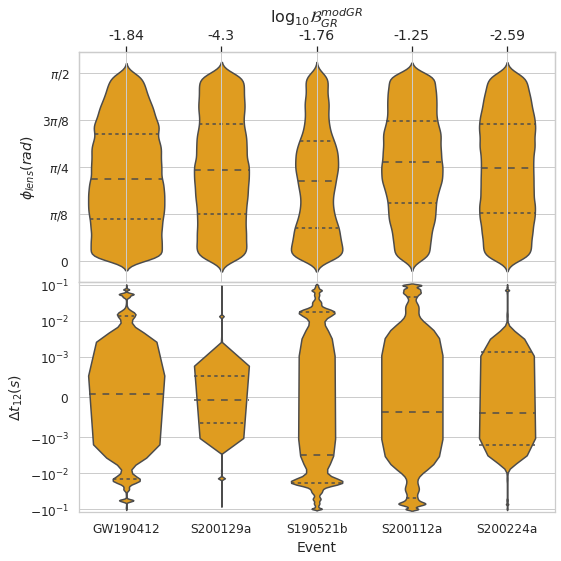

In [15]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8), 
                         sharex=True, gridspec_kw=dict(height_ratios=(1, 1), hspace=0))
ticks = np.arange(5)

sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.violinplot(x='event',y=par1,data=samples_events_df,scale="count",inner="quartile",ax=axes[1],color="orange")
axes[1].set_ylabel('$\Delta t_{12}(s)$', fontsize=14)
axes[1].set_xticks(ticks)
axes[1].set_yscale('symlog',linthresh=0.001)
sns.violinplot(x='event',y=par2,data=samples_events_df,scale="count",inner="quartile",ax=axes[0],color="orange")
axes[0].set_ylabel('$\phi_{lens}(rad)$', fontsize=14)
axes[0].set_yticks(np.arange(0, np.pi/2+0.01, np.pi/8))
labels = ['$0$', r'$\pi/8$', r'$\pi/4$', r'$3\pi/8$', r'$\pi/2$']
axes[0].set_yticklabels(labels)
    
axes[0].set_xticks(ticks)
#axes[0].set_xticklabels(paths_res['Log_BF_NGR_GR'], fontsize=14)
ax=axes[0].twiny()
ax.set_xlim(axes[0].get_xlim())
ax.set_xticks(ticks)
ax.set_xlabel('$\log_{10} \mathcal{B}^{modGR}_{GR}$',fontsize=16)
ax.set_xticklabels(np.round(paths_res['Log_BF_NGR_GR'],2), fontsize=14)
axes[1].set_xlabel('Event', fontsize=14)

fig.tight_layout()
#plt.savefig('plots_real_events/real_events.pdf')
plt.savefig('plots_real_events/real_events_log.pdf')


plt.show()

## Alice runs results



In [4]:
def plot_corner_resbilby(res,outfile, GR=False):
    if GR == False:
        
        pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn','psi','phase','t12','lens_angle','geocent_time','ra','dec']
        res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
        plt.close()
        par1='t12'
        par2='lens_angle'
        plt.figure()
        sns.jointplot(
            data=res.posterior,
            x=par1, y=par2,
            kind="hist")
        #plt.scatter(res.posterior[par1],res.posterior[par2],c=res.posterior['log_likelihood'])
        #plt.colorbar()
        #plt.xlabel(par1)
        #plt.ylabel(par2)
        plt.savefig(outfile + '_2d.png')
        plt.close()
    else:
        pars =['chirp_mass','mass_ratio','a_1','a_2','theta_jn','psi','phase','geocent_time','ra','dec']
        res.plot_corner(parameters=pars, save=True,labels = pars,filename = outfile+'_corner.png')
        plt.close()

In [5]:
events_df_info=pd.read_csv('../Miguel_codes/events_df_info.csv')
events_df_info.tail()
events_df_info.set_index(events_df_info['GRACEDBSID'],inplace=True)
events_df_info

Unnamed: 0  Unnamed: 0.1 CatDev Name     SNAME         FULLNAME  \
GRACEDBSID                                                                    
S191118ae            0             0   GW191118A  S191118a    191118_212859   
S200105ae            1             1   GW200105A  S200105a  GW200105_162426   
S200121aa            2             2   GW200121A  S200121a    200121_031748   
S200201bh            3             3   GW200201A  S200201a    200201_203549   
S200219bj            4             4   GW200219B  S200219b    200219_201407   
...                ...           ...         ...       ...              ...   
S200308bl           83            83   GW200308A  S200308a  GW200308_173609   
S200311bg           84            84   GW200311B  S200311b  GW200311_115853   
S200316bj           85            85   GW200316A  S200316a  GW200316_215756   
S200322ab           86            86   GW200322A  S200322a  GW200322_091133   
S200326af           87            87   GW200326A  S200326a  GW200326_112501   

                      NNAME  MINIMALNAME GRACEDBSID  IS PUBLIC?  CWB ONLY?  \
GRACEDBSID                                                                   
S191118ae     191118_212859       191118  S191118ae       False      False   
S200105ae   GW200105_162426     GW200105  S200105ae        True      False   
S200121aa     200121_031748       200121  S200121aa       False      False   
S200201bh     200201_203549       200201  S200201bh       False      False   
S200219bj     200219_201407    200219_20  S200219bj       False      False   
...                     ...          ...        ...         ...        ...   
S200308bl   GW200308_173609     GW200308  S200308bl       False      False   
S200311bg   GW200311_115853  GW200311_11  S200311bg        True      False   
S200316bj   GW200316_215756     GW200316  S200316bj        True      False   
S200322ab   GW200322_091133     GW200322  S200322ab       False      False   
S200326af   GW200326_112501     GW200326  S200326af       False       True   

            ...   mass2 L1  mchirp L1   mtotal L1  template_duration L1  \
GRACEDBSID  ...                                                           
S191118ae   ...   2.144801   2.610765    6.438363             31.592773   
S200105ae   ...   1.032021   3.719036   26.974665             62.178373   
S200121aa   ...        NaN        NaN         NaN                   NaN   
S200201bh   ...   1.252731   2.064147    6.145616             40.667645   
S200219bj   ...   2.657284  10.451291   85.475464              3.901882   
...         ...        ...        ...         ...                   ...   
S200308bl   ...  34.847599  41.906761  102.818770              4.399324   
S200311bg   ...  32.121094  29.053270   66.805939              2.704791   
S200316bj   ...   4.943711  10.775739   41.868874             11.333138   
S200322ab   ...  15.137034  24.386002   71.318713              0.720487   
S200326af   ...        NaN        NaN         NaN                   NaN   

              snr V1   mass1 V1   mass2 V1  mchirp V1   mtotal V1  \
GRACEDBSID                                                          
S191118ae   7.350384   4.293562   2.144801   2.610765    6.438363   
S200105ae   2.716746  25.942644   1.032021   3.719036   26.974665   
S200121aa   4.852214  92.649368   1.004446   6.122888   93.653814   
S200201bh   3.034509   4.892885   1.252731   2.064147    6.145616   
S200219bj        NaN        NaN        NaN        NaN         NaN   
...              ...        ...        ...        ...         ...   
S200308bl   2.133489  67.971169  34.847599  41.906761  102.818770   
S200311bg   7.292044  34.684841  32.121094  29.053270   66.805939   
S200316bj   3.119627  36.925163   4.943711  10.775739   41.868874   
S200322ab   2.242833  56.181679  15.137034  24.386002   71.318713   
S200326af        NaN        NaN        NaN        NaN         NaN   

            template_duration V1  
GRACEDBSID                        
S191118ae              31

In [6]:
json_list=np.loadtxt('real_events_alice.txt',dtype=str)
res_real_nGR = pd.DataFrame()
res_real_nGR['path'] = json_list
res_real_nGR['event_S'] = [json.split('/')[-1][:-12] for json in json_list]
res_real_nGR['Log evidence nonGR']=''
res_real_nGR['Log BF nonGR']=''
res_real_nGR['event'] = events_df_info['NNAME'].loc[res_real_nGR['event_S'].values].values

In [7]:
json_list_GR=np.loadtxt('real_events_alice_GR.txt',dtype=str)
res_real_GR = pd.DataFrame()
res_real_GR['path'] = json_list_GR
res_real_GR['event_S'] = [json.split('/')[-1][:-12] for json in json_list_GR]
res_real_GR['Log evidence GR']=''
res_real_GR['Log BF GR']=''
res_real_GR['event'] = events_df_info['NNAME'].loc[res_real_GR['event_S'].values].values

In [8]:
json_list_o1o2=np.loadtxt('real_events_alice_o1o2_nonGR.txt',dtype=str)
json_list_o1o2_GR=np.loadtxt('real_events_alice_o1o2_GR.txt',dtype=str)
res_real_nGR_o1o2,res_real_o1o2_GR=pd.DataFrame(),pd.DataFrame()
res_real_nGR_o1o2['path'] = json_list_o1o2
res_real_nGR_o1o2['event_S'] = [json.split('/')[-5] for json in json_list_o1o2]
res_real_nGR_o1o2['Log evidence nonGR']=''
res_real_nGR_o1o2['Log BF nonGR']=''
res_real_nGR_o1o2['event'] = res_real_nGR_o1o2['event_S']


res_real_o1o2_GR['path'] = json_list_o1o2_GR
res_real_o1o2_GR['event_S'] = [json.split('/')[-5] for json in json_list_o1o2_GR]
res_real_o1o2_GR['Log evidence GR']=''
res_real_o1o2_GR['Log BF GR']=''
res_real_o1o2_GR['event'] = res_real_o1o2_GR['event_S']

In [9]:
res_real_nGR=res_real_nGR.append(res_real_nGR_o1o2).reset_index(drop=True)
res_real_GR=res_real_GR.append(res_real_o1o2_GR).reset_index(drop=True)

In [10]:
nongr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_nGR_py39/final_result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_merge_result.hdf5'
gr_res = '/home1/srashti.goyal/tgr-lensing/codes/S190521g_bilby_pipe/27022022_tm_off_GR/result/ProdF12_data0_1242442967-459473_analysis_H1L1V1_dynesty_merge_result.json'
idx=res_real_nGR[res_real_nGR['event']=='GW190521'].index[0]
res_real_nGR.loc[idx,'path'] = nongr_res

idx=res_real_GR[res_real_GR['event']=='GW190521'].index[0]
res_real_GR.loc[idx,'path'] = gr_res

In [11]:
for i,json in enumerate(res_real_nGR['path']):
    res = bilby.result.read_in_result(json)
    event = res_real_nGR['event'][i]
    print(event, 'LOG Z: %.3f'%res.log_evidence, 'LOG BF: %.3f'%res.log_bayes_factor, 'LOG Noise Z: %.3f'%res.log_noise_evidence)
    res_real_nGR['Log evidence nonGR'][i]=res.log_bayes_factor
    res_real_nGR['Log BF nonGR'][i] = res.log_evidence
    #plot_corner_resbilby(res,'plots_real_events/alice_'+event)

GW190408_181802 LOG Z: -20185.758 LOG BF: 72.950 LOG Noise Z: -20258.708
GW190503_185404 LOG Z: -10779.301 LOG BF: 40.558 LOG Noise Z: -10819.859
GW190512_180714 LOG Z: -20009.834 LOG BF: 47.979 LOG Noise Z: -20057.813
GW190513_205428 LOG Z: -10617.477 LOG BF: 46.310 LOG Noise Z: -10663.787
GW190517_055101 LOG Z: -11144.186 LOG BF: 23.046 LOG Noise Z: -11167.233
GW190630_185205 LOG Z: -8105.494 LOG BF: 95.175 LOG Noise Z: -8200.669
GW190706_222641 LOG Z: -6604.970 LOG BF: 61.417 LOG Noise Z: -6666.387
GW190707_093326 LOG Z: -60585.124 LOG BF: 49.644 LOG Noise Z: -60634.768
GW190708_232457 LOG Z: -31676.678 LOG BF: 56.550 LOG Noise Z: -31733.228
GW190720_000836 LOG Z: -95756.550 LOG BF: 13.695 LOG Noise Z: -95770.245
GW190727_060333 LOG Z: -10417.557 LOG BF: 36.845 LOG Noise Z: -10454.402
GW190828_063405 LOG Z: -10172.054 LOG BF: 97.726 LOG Noise Z: -10269.781
GW190828_065509 LOG Z: -19830.009 LOG BF: 21.291 LOG Noise Z: -19851.301
GW190910_112807 LOG Z: -2874.201 LOG BF: 69.808 LOG Noi

In [12]:
for i,json in enumerate(res_real_GR['path']):
    res = bilby.result.read_in_result(json)
    event = res_real_GR['event'][i]
    print(event, 'LOG Z: %.3f'%res.log_evidence, 'LOG BF: %.3f'%res.log_bayes_factor, 'LOG Noise Z: %.3f'%res.log_noise_evidence)
    res_real_GR['Log evidence GR'][i]=res.log_bayes_factor
    res_real_GR['Log BF GR'][i] = res.log_evidence
    #plot_corner_resbilby(res,'plots_real_events/alice_GR_'+event,GR=True)

GW190408_181802 LOG Z: -20184.410 LOG BF: 74.299 LOG Noise Z: -20258.708
GW190412 LOG Z: -45902.570 LOG BF: 144.906 LOG Noise Z: -46047.476
GW190503_185404 LOG Z: -10777.550 LOG BF: 42.309 LOG Noise Z: -10819.859
GW190512_180714 LOG Z: -20009.829 LOG BF: 47.984 LOG Noise Z: -20057.813
GW190513_205428 LOG Z: -10616.719 LOG BF: 47.068 LOG Noise Z: -10663.787
GW190517_055101 LOG Z: -11143.444 LOG BF: 23.789 LOG Noise Z: -11167.233
GW190630_185205 LOG Z: -8105.086 LOG BF: 95.583 LOG Noise Z: -8200.669
GW190706_222641 LOG Z: -6603.522 LOG BF: 62.864 LOG Noise Z: -6666.387
GW190707_093326 LOG Z: -60583.460 LOG BF: 51.308 LOG Noise Z: -60634.768
GW190708_232457 LOG Z: -31675.561 LOG BF: 57.667 LOG Noise Z: -31733.228
GW190720_000836 LOG Z: -95753.127 LOG BF: 17.118 LOG Noise Z: -95770.245
GW190727_060333 LOG Z: -10415.574 LOG BF: 38.827 LOG Noise Z: -10454.402
GW190728_064510 LOG Z: -93592.836 LOG BF: 49.236 LOG Noise Z: -93642.072
GW190828_063405 LOG Z: -10170.580 LOG BF: 99.200 LOG Noise Z:

In [13]:
res_real_GR

path    event_S  \
0   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190408an   
1   /home1/srashti.goyal/public_html/tgr-lensing/2...   S190412m   
2   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190503bf   
3   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190512at   
4   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190513bm   
5   /home1/srashti.goyal/public_html/tgr-lensing/2...   S190517h   
6   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190630ag   
7   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190706ai   
8   /home1/srashti.goyal/public_html/tgr-lensing/2...   S190707q   
9   /home1/srashti.goyal/public_html/tgr-lensing/2...  S190708ap   
10  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190720a   
11  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190727h   
12  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190728q   
13  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190828j   
14  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190828l   
15  /home1/srashti.goyal/public_html/tgr-lensing/2...   S190910s   
16  /home1/srashti.goyal/public_html/tgr-lensing/2...   S191109d   
17  /home1/srashti.goyal/public_html/tgr-lensing/2...   S191129u   
18  /home1/srashti.goyal/public_html/tgr-lensing/2...   S191215w   
19  /home1/srashti.goyal/public_html/tgr-lensing/2...  S191216ap   
20  /home1/srashti.goyal/public_html/tgr-lensing/2...   S191222n   
21  /home1/srashti.goyal/public_html/tgr-lensing/2...   S200112r   
22  /home1/srashti.goyal/public_html/tgr-lensing/2...   S200129m   
23  /home1/srashti.goyal/public_html/tgr-lensing/2...  S200202ac   
24  /home1/srashti.goyal/public_html/tgr-lensing/2...   S200208q   
25  /home1/srashti.goyal/public_html/tgr-lensing/2...  S200219ac   
26  /home1/srashti.goyal/public_html/tgr-lensing/2...  S200224ca   
27  /home1/srashti.goyal/public_html/tgr-lensing/2...   S200225q   
28  /home1/srashti.goyal/public_html/tgr-lensing/2...  S200311bg   
29  /home1/srashti.goyal/public_html/tgr-lensing/2...  S200316bj   
30  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190421ar   
31  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190519bj   
32  /home1/srashti.goyal/tgr-lensing/codes/S190521...   S190521g   
33  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190521r   
34  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190602aq   
35  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190915ak   
36  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW150914   
37  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW151012   
38  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW151226   
39  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170104   
40  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170729   
41  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170809   
42  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170814   
43  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170818   
44  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170823   

   Log evidence GR     Log BF GR            event  
0        74.298589 -20184.409617  GW190408_181802  
1       144.906163 -45902.569675         GW190412  
2        42.308903 -10777.550169  GW190503_185404  
3         47.98421  -20009.82883  GW190512_180714  
4        47.068141 -10616.719128  GW190513_205428  
5         23.78914 -11143.443616  GW190517_055101  
6        95.582501  -8105.086062  GW190630_185205  
7         62.86449  -6603.522142  GW190706_222641  
8        51.308345 -60583.459689  GW190707_093326  
9        57.667173 -31675.561253  GW190708_232457  
10       17.117928 -95753.126854  GW190720_000836  
11       38.827455  -10415.57426  GW190727_060333  
12       49.236311 -93592.836162  GW190728_064510  
13       99.200277 -10170.580321  GW190828_063405  
14       21.777995 -19829.522788  GW190828_065509  
15       68.981188  -2875.027919  GW190910_112807  
16      104.870726  -2526.003112  GW

In [14]:
res_real_nGR

path    event_S  \
0   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190408an   
1   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190503bf   
2   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190512at   
3   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190513bm   
4   /home1/srashti.goyal/public_html/tgr-lensing/1...   S190517h   
5   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190630ag   
6   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190706ai   
7   /home1/srashti.goyal/public_html/tgr-lensing/1...   S190707q   
8   /home1/srashti.goyal/public_html/tgr-lensing/1...  S190708ap   
9   /home1/srashti.goyal/public_html/tgr-lensing/1...   S190720a   
10  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190727h   
11  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190828j   
12  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190828l   
13  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190910s   
14  /home1/srashti.goyal/public_html/tgr-lensing/1...   S191109d   
15  /home1/srashti.goyal/public_html/tgr-lensing/1...   S191129u   
16  /home1/srashti.goyal/public_html/tgr-lensing/1...   S191204r   
17  /home1/srashti.goyal/public_html/tgr-lensing/1...   S191215w   
18  /home1/srashti.goyal/public_html/tgr-lensing/1...  S191216ap   
19  /home1/srashti.goyal/public_html/tgr-lensing/1...   S191222n   
20  /home1/srashti.goyal/public_html/tgr-lensing/1...   S200112r   
21  /home1/srashti.goyal/public_html/tgr-lensing/1...   S200129m   
22  /home1/srashti.goyal/public_html/tgr-lensing/1...  S200202ac   
23  /home1/srashti.goyal/public_html/tgr-lensing/1...   S200208q   
24  /home1/srashti.goyal/public_html/tgr-lensing/1...  S200219ac   
25  /home1/srashti.goyal/public_html/tgr-lensing/1...  S200224ca   
26  /home1/srashti.goyal/public_html/tgr-lensing/1...   S200225q   
27  /home1/srashti.goyal/public_html/tgr-lensing/1...  S200311bg   
28  /home1/srashti.goyal/public_html/tgr-lensing/1...  S200316bj   
29  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190421ar   
30  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190519bj   
31  /home1/srashti.goyal/tgr-lensing/codes/S190521...   S190521g   
32  /home1/srashti.goyal/public_html/tgr-lensing/1...   S190521r   
33  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190602aq   
34  /home1/srashti.goyal/public_html/tgr-lensing/1...  S190915ak   
35  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW150914   
36  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW151012   
37  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW151226   
38  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170104   
39  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170729   
40  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170809   
41  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170814   
42  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170818   
43  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170823   

   Log evidence nonGR  Log BF nonGR            event  
0           72.950062 -20185.758144  GW190408_181802  
1           40.558156 -10779.300916  GW190503_185404  
2           47.979411  -20009.83363  GW190512_180714  
3           46.309821 -10617.477448  GW190513_205428  
4           23.046475 -11144.186282  GW190517_055101  
5           95.174582  -8105.493982  GW190630_185205  
6           61.417053  -6604.969579  GW190706_222641  
7           49.643968 -60585.124066  GW190707_093326  
8           56.549976  -31676.67845  GW190708_232457  
9           13.694563 -95756.550219  GW190720_000836  
10          36.844618 -10417.557097  GW190727_060333  
11          97.726219 -10172.054378  GW190828_063405  
12          21.291334 -19830.009448  GW190828_065509  
13          69.808327   -2874.20078  GW190910_112807  
14         105.665589  -2525.208248  GW191109_010717  
15          50.134211 -57473.887504  GW191129_134029  
16         111.372483 -29487.927502  GW191204_171526 

In [15]:
res_combined = pd.merge(res_real_nGR,res_real_GR, on='event',suffixes=(' nonGR', ' GR'))

In [16]:
res_combined

path nonGR event_S nonGR  \
0   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190408an   
1   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190503bf   
2   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190512at   
3   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190513bm   
4   /home1/srashti.goyal/public_html/tgr-lensing/1...      S190517h   
5   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190630ag   
6   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190706ai   
7   /home1/srashti.goyal/public_html/tgr-lensing/1...      S190707q   
8   /home1/srashti.goyal/public_html/tgr-lensing/1...     S190708ap   
9   /home1/srashti.goyal/public_html/tgr-lensing/1...      S190720a   
10  /home1/srashti.goyal/public_html/tgr-lensing/1...      S190727h   
11  /home1/srashti.goyal/public_html/tgr-lensing/1...      S190828j   
12  /home1/srashti.goyal/public_html/tgr-lensing/1...      S190828l   
13  /home1/srashti.goyal/public_html/tgr-lensing/1...      S190910s   
14  /home1/srashti.goyal/public_html/tgr-lensing/1...      S191109d   
15  /home1/srashti.goyal/public_html/tgr-lensing/1...      S191129u   
16  /home1/srashti.goyal/public_html/tgr-lensing/1...      S191215w   
17  /home1/srashti.goyal/public_html/tgr-lensing/1...     S191216ap   
18  /home1/srashti.goyal/public_html/tgr-lensing/1...      S191222n   
19  /home1/srashti.goyal/public_html/tgr-lensing/1...      S200112r   
20  /home1/srashti.goyal/public_html/tgr-lensing/1...      S200129m   
21  /home1/srashti.goyal/public_html/tgr-lensing/1...     S200202ac   
22  /home1/srashti.goyal/public_html/tgr-lensing/1...      S200208q   
23  /home1/srashti.goyal/public_html/tgr-lensing/1...     S200219ac   
24  /home1/srashti.goyal/public_html/tgr-lensing/1...     S200224ca   
25  /home1/srashti.goyal/public_html/tgr-lensing/1...      S200225q   
26  /home1/srashti.goyal/public_html/tgr-lensing/1...     S200311bg   
27  /home1/srashti.goyal/public_html/tgr-lensing/1...     S200316bj   
28  /home1/srashti.goyal/public_html/tgr-lensing/1...     S190421ar   
29  /home1/srashti.goyal/public_html/tgr-lensing/1...     S190519bj   
30  /home1/srashti.goyal/tgr-lensing/codes/S190521...      S190521g   
31  /home1/srashti.goyal/public_html/tgr-lensing/1...      S190521r   
32  /home1/srashti.goyal/public_html/tgr-lensing/1...     S190602aq   
33  /home1/srashti.goyal/public_html/tgr-lensing/1...     S190915ak   
34  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW150914   
35  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW151012   
36  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW151226   
37  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170104   
38  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170729   
39  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170809   
40  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170814   
41  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170818   
42  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170823   

   Log evidence nonGR  Log BF nonGR            event  \
0           72.950062 -20185.758144  GW190408_181802   
1           40.558156 -10779.300916  GW190503_185404   
2           47.979411  -20009.83363  GW190512_180714   
3           46.309821 -10617.477448  GW190513_205428   
4           23.046475 -11144.186282  GW190517_055101   
5           95.174582  -8105.493982  GW190630_185205   
6           61.417053  -6604.969579  GW190706_222641   
7           49.643968 -60585.124066  GW190707_093326   
8           56.549976  -31676.67845  GW190708_232457   
9           13.694563 -95756.550219  GW190720_000836   
10          36.844618 -10417.557097  GW190727_060333   
11          97.726219 -10172.054378  GW190828_063405   
12          21.291334 -19830.009448  GW190828_065509   
13          69.808327   -2874.20078  GW190910_112807   
14         105.665589  -2525.208248  GW191109_010717   
15          50.134211 

In [17]:
res_combined['Log_BF_NGR_GR'] = res_combined['Log evidence nonGR'] - res_combined['Log evidence GR']


In [18]:
res_combined['Log_BF_NGR_GR_fromBF'] = res_combined['Log BF nonGR'] - res_combined['Log BF GR']



In [20]:
res_combined

path nonGR  \
event                                                                
GW190408_181802  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190503_185404  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190512_180714  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190513_205428  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190517_055101  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190630_185205  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190706_222641  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190707_093326  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190708_232457  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190720_000836  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190727_060333  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190828_063405  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190828_065509  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190910_112807  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW191109_010717  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW191129_134029  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW191215_223052  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW191216_213338  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW191222_033537  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200112_155838  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200129_065458  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200202_154313  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200208_130117  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200219_094415  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200224_222234  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200225_060421  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200311_115853  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW200316_215756  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190421_213856  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190519_153544  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190521         /home1/srashti.goyal/tgr-lensing/codes/S190521...   
GW190521_074359  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190602_175927  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW190915_235702  /home1/srashti.goyal/public_html/tgr-lensing/1...   
GW150914         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW151012         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW151226         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170104         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170729         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170809         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170814         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170818         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   
GW170823         /home1/srashti.goyal/tgr-lensing/codes/real_ev...   

                event_S nonGR Log evidence nonGR  Log BF nonGR  \
event                                                            
GW190408_181802     S190408an          72.950062 -20185.758144   
GW190503_185404     S190503bf          40.558156 -10779.300916   
GW190512_180714     S190512at          47.979411  -20009.83363   
GW190513_205428     S190513bm          46.309821 -10617.477448   
GW190517_055101      S190517h          23.046475 -11144.186282   
GW190630_185205     S190630ag          95.174582  -8105.493982   
GW190706_222641     S190706ai          61.417053  -6604.969579   
GW190707_093326      S190707q          49.643968 -60585.124066   
GW190708_232457     S190708ap          56.549976  -31676.67845   
GW190720_000836      S190720a          13.694563 -95756.550219   
GW190727_060333      S190727h          36.844618 -10417.557097   
GW190828_063405      S190828j          97.72621

In [19]:
res_combined.set_index('event',inplace=True)
res_combined.to_csv('real_events_alice_results_all.csv')

# violin

In [21]:
%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
fontSz = 15
fontsz = 13
fontssz = 11

def latex_float(f):
    float_str = "{0:.2g}".format(f)
    if "e" in float_str:
        base, exponent = float_str.split("e")
        if int(base)==1:
            return r"10^{{{0}}}".format(int(exponent))
        if int(base)==-1:
            return r"-10^{{{0}}}".format(int(exponent))
        else:
            return r"{0} \cdot 10^{{{1}}}".format(base, int(exponent))
    else:
        return float_str
    
print('latex test: '+latex_float(1.0e9), latex_float(-1e-9))

latex test: 10^{9} -10^{-9}


In [22]:
res_combined = pd.read_csv('real_events_alice_results_all.csv',index_col=0)

In [23]:

res_combined.tail()

path nonGR event_S nonGR  \
event                                                                       
GW170729  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170729   
GW170809  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170809   
GW170814  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170814   
GW170818  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170818   
GW170823  /home1/srashti.goyal/tgr-lensing/codes/real_ev...      GW170823   

          Log evidence nonGR  Log BF nonGR  \
event                                        
GW170729           37.333383 -11917.295201   
GW170809           56.170795 -12026.116897   
GW170814          125.270140 -12347.089262   
GW170818           44.630510 -12260.565289   
GW170823           55.017620  -8061.561863   

                                                    path GR event_S GR  \
event                                                                    
GW170729  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170729   
GW170809  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170809   
GW170814  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170814   
GW170818  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170818   
GW170823  /home1/srashti.goyal/tgr-lensing/codes/real_ev...   GW170823   

          Log evidence GR     Log BF GR  Log_BF_NGR_GR  Log_BF_NGR_GR_fromBF  
event                                                                         
GW170729        37.962906 -11916.665678      -0.629523             -0.629523  
GW170809        57.386722 -12024.900969      -1.215928             -1.215928  
GW170814       126.865590 -12345.493812      -1.595450             -1.595450  
GW170818        46.900347 -12258.295452      -2.269837             -2.269837  
GW170823        54.197648  -8062.381834       0.819971              0.819971

In [24]:
res_combined.sort_values(by='Log_BF_NGR_GR_fromBF',ascending=False,inplace=True)

In [25]:
res_combined['Log_BF_NGR_GR_fromBF']

event
GW190521           3.212687
GW190910_112807    0.827139
GW170823           0.819971
GW191109_010717    0.794864
GW191129_134029    0.115943
GW190512_180714   -0.004799
GW200219_094415   -0.295883
GW190630_185205   -0.407919
GW190828_065509   -0.486660
GW200225_060421   -0.623489
GW170729          -0.629523
GW190915_235702   -0.692238
GW190517_055101   -0.742666
GW190513_205428   -0.758320
GW190421_213856   -0.796870
GW191215_223052   -0.796953
GW190708_232457   -1.117197
GW190519_153544   -1.162706
GW170809          -1.215928
GW151012          -1.250549
GW200112_155838   -1.316820
GW151226          -1.323466
GW190408_181802   -1.348527
GW190706_222641   -1.447437
GW191222_033537   -1.448232
GW190828_063405   -1.474058
GW170814          -1.595450
GW190707_093326   -1.664377
GW190503_185404   -1.750747
GW170104          -1.878646
GW190521_074359   -1.959624
GW190727_060333   -1.982837
GW200208_130117   -2.220576
GW170818          -2.269837
GW150914          -2.485687
GW190602_17592

In [26]:
np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,2)

array([ 3.21,  0.83,  0.82,  0.79,  0.12, -0.  , -0.3 , -0.41, -0.49,
       -0.62, -0.63, -0.69, -0.74, -0.76, -0.8 , -0.8 , -1.12, -1.16,
       -1.22, -1.25, -1.32, -1.32, -1.35, -1.45, -1.45, -1.47, -1.6 ,
       -1.66, -1.75, -1.88, -1.96, -1.98, -2.22, -2.27, -2.49, -2.75,
       -2.96, -3.42, -3.72, -3.94, -4.53, -4.82, -5.5 ])

In [27]:
par1='t12'
par2='lens_angle'
samples_events=[]
for i,event in enumerate(res_combined.index.values):
    json = res_combined.loc[event]['path nonGR']
    res_nonGR = bilby.result.read_in_result(json)
    samples = res_nonGR.posterior[[par1,par2,'log_likelihood']]
    samples['event'] = event
    samples_events.append(samples)
samples_events_df = pd.concat(samples_events)

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
samples_events_df.tail()

t12  lens_angle  log_likelihood            event
105618 -0.087073    1.356344        59.76776  GW200316_215756
105619 -0.087073    1.356344        59.76776  GW200316_215756
105620 -0.087073    1.356344        59.76776  GW200316_215756
105621 -0.087073    1.356344        59.76776  GW200316_215756
105622 -0.087073    1.356344        59.76776  GW200316_215756

In [29]:
samples_events_df['t12_ms'] =samples_events_df['t12']*1e3

In [30]:
samples_events_df

t12  lens_angle  log_likelihood            event     t12_ms
0      -0.011352    1.133677       89.558990         GW190521 -11.351725
1      -0.011229    0.367823       92.332054         GW190521 -11.228914
2       0.012505    1.367327       93.053055         GW190521  12.504782
3      -0.021551    0.543984       93.826562         GW190521 -21.551290
4       0.019850    1.242088       94.309237         GW190521  19.850195
...          ...         ...             ...              ...        ...
105618 -0.087073    1.356344       59.767760  GW200316_215756 -87.072515
105619 -0.087073    1.356344       59.767760  GW200316_215756 -87.072515
105620 -0.087073    1.356344       59.767760  GW200316_215756 -87.072515
105621 -0.087073    1.356344       59.767760  GW200316_215756 -87.072515
105622 -0.087073    1.356344       59.767760  GW200316_215756 -87.072515

[5061970 rows x 5 columns]

/home1/srashti.goyal/anaconda3/envs/bilby_env/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  del sys.path[0]


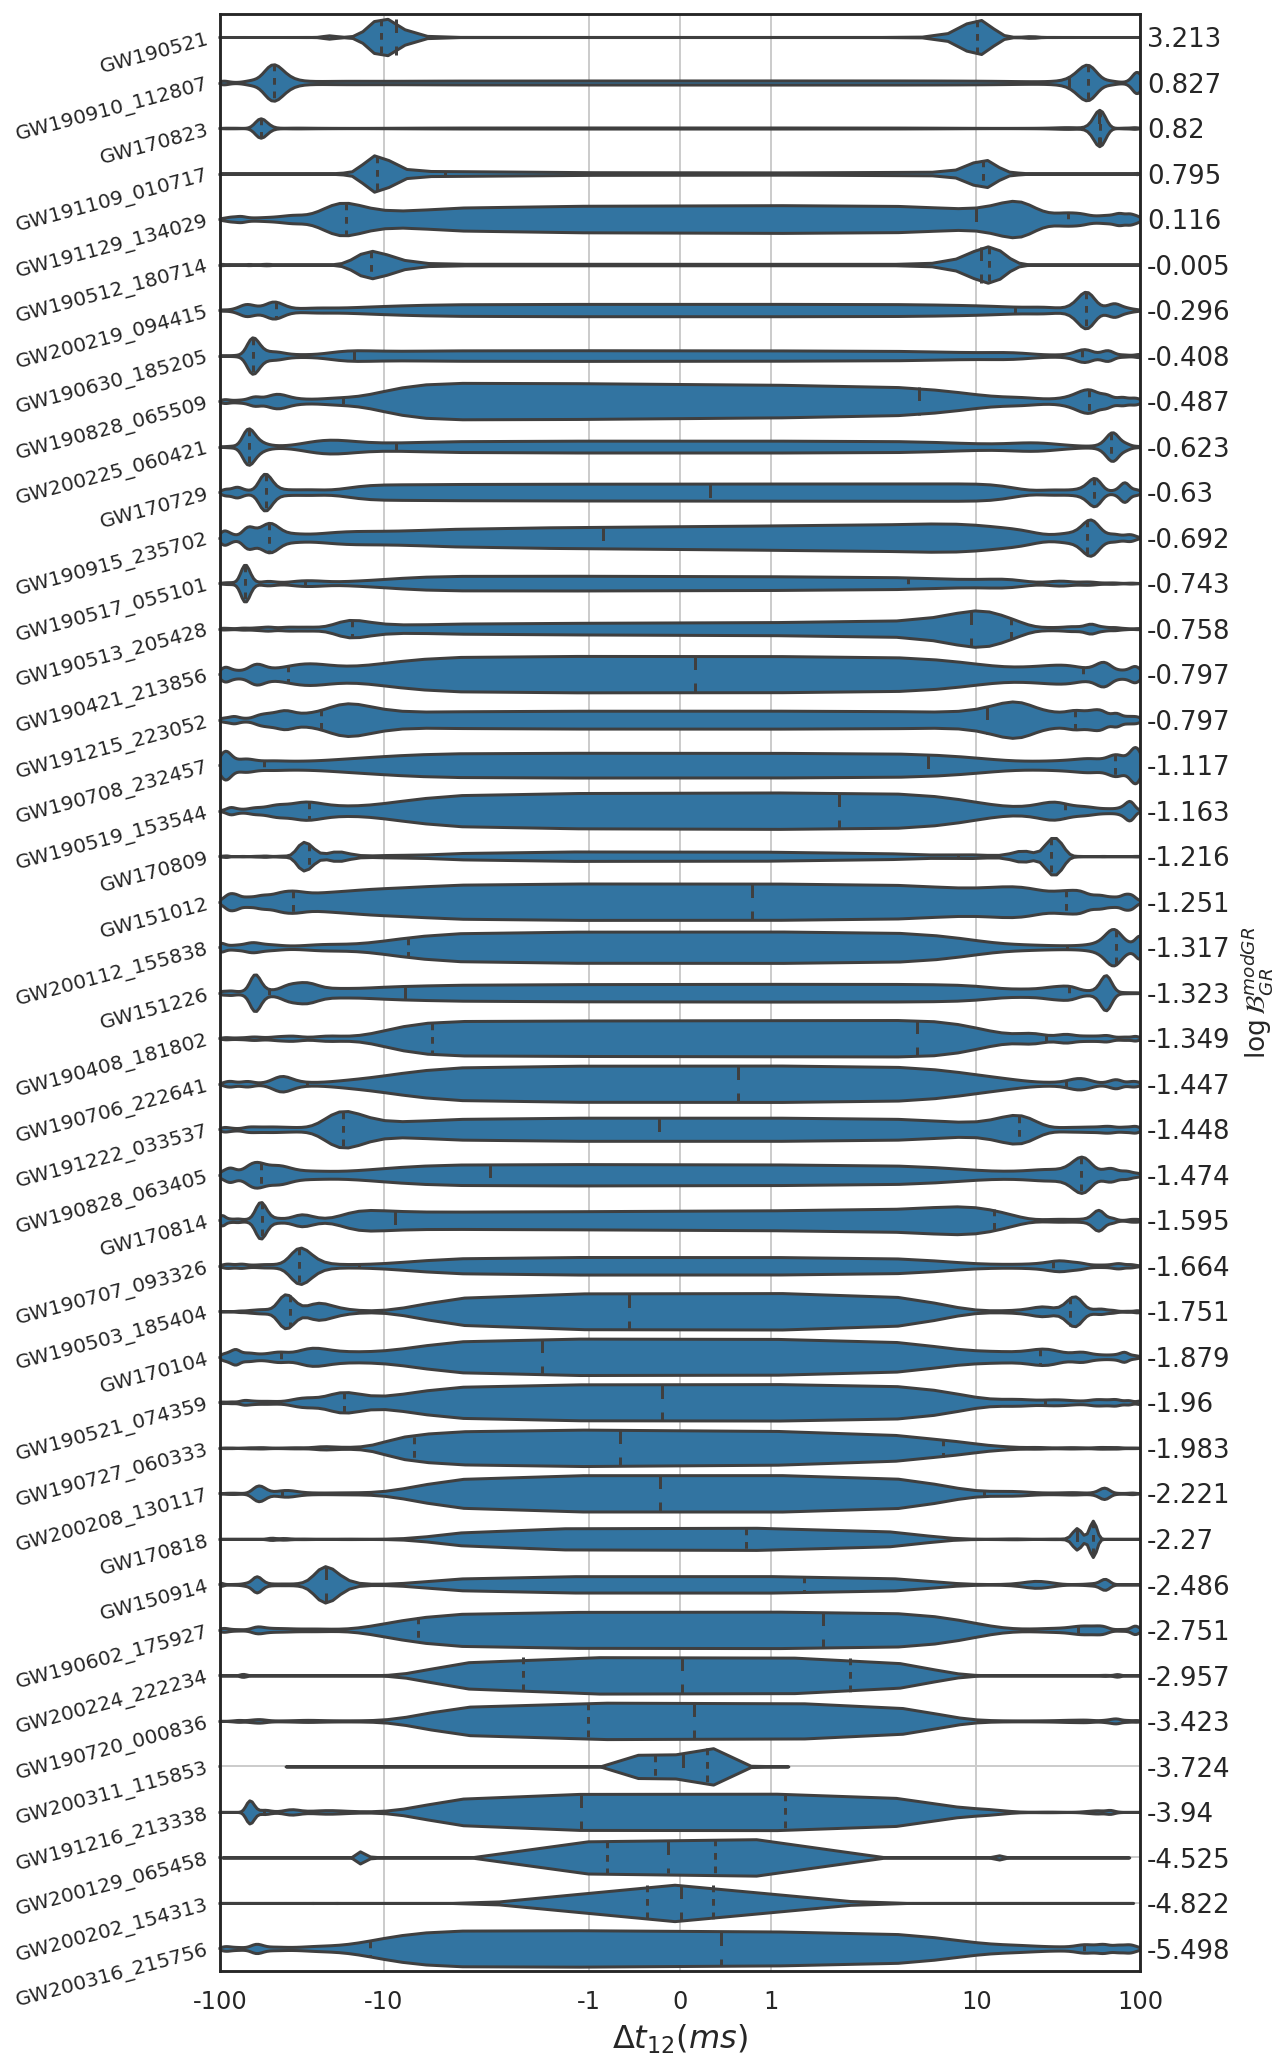

In [42]:
fig, axes = plt.subplots(figsize=(9, 18))
fig.subplots_adjust(left=0.19)
ticks = np.arange(len(res_combined.index.values))
sns.set(font_scale = 1.1)
sns.set_style('white')
axes.set_yticks(ticks)
plt.rc('text', usetex=False)
sns.violinplot(y='event',x=par1+'_ms',data=samples_events_df,scale="width",inner="quartile",color="tab:blue")
axes.set_xlabel('$\Delta t_{12}(ms)$', fontsize=16)
axes.set_xscale('symlog')#,linthresh=1)
#axes.set_yticklabels(['0','1','3','10','30'])
axes.tick_params(axis='x', which='minor')
axes.set_xticklabels(['-100','-10','-1','0','1','10','100'])
axes.set_xlim(-100,100)
axes.tick_params(axis='y', length=1,rotation = 15,labelsize=10)

#plt.xticks(fontsize=14, rotation=90)

#locmin = matplotlib.ticker.LogLocator(base=10.0, subs=(0.1,0.2,0.4,0.6,0.8,1,2,4,6,8,10 )) 
#axes.xaxis.set_minor_locator(locmin)
#axes.xaxis.set_minor_formatter(matplotlib.ticker.NullFormatter())
axes.grid(which='both')

#axes.set_xscale('symlog',linthresh=0.001)


#axes[1].set_yticks(np.hstack([-(10**np.linspace(-1,-3,3)),0,10**np.linspace(-3,-1,3)]))


#axes.set_yticklabels(np.unique(samples_events_df['EVENT_GW']), fontsize=14)
ax=axes.twinx()
#ax.set_xticklabels(['','','','',''])
ax.set_ylim(axes.get_ylim())
ax.set_yticks(ticks)
#ax.tick_params(axis ='y')
ax.tick_params(axis='y', length=0)
ax.set_ylabel('$\log \mathcal{B}^{modGR}_{GR}$')
ax.set_yticklabels(np.around(res_combined['Log_BF_NGR_GR_fromBF'].values,3),fontsize=13)
axes.set_ylabel('')
#fig.tight_layout()
plt.savefig('plots_real_events/interesting/alice_violin_t12_vertical_all.pdf')
plt.show()